# Rating analysis

### Business question: What determinate the ratings of the board games?
* Maximum number of players
* Minimum playing age
* Category
* Is it part of a compilation
* Year published
* Publisher
* Artist

### What the code contains
* Univariate analysis of the outcome variable and each predictor (including dtaa cleaning, variable recodings)
* Bivariate analysis of the relationship between the predictors and the ratings
* Regression analysis

**Import libraries**

In [154]:
import pandas as pd
# %matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import matplotlib.ticker as ticker

####  1. Import  data

In [38]:
# Import dataset 
board_games = pd.read_csv("board_games_workfile.csv", sep=';')
board_games.head()

,Unnamed: 0,Unnamed: 0_base,game_id_base,description_base,max_players_base,max_playtime_base,min_age_base,min_players_base,min_playtime_base,name_base,...,players_api,plays_api,playtime_api,price_api,price_au_api,price_ca_api,price_uk_api,visits_api,year_published_api,name_lower_api
0,0,0,1,Die Macher is a game about seven sequential po...,5,240,14,3,240,Die Macher,...,3-5,162,240,0.00,0.00,0.00,0.00,741,1986.0,die macher
1,1,2,3,"Part of the Knizia tile-laying trilogy, Samura...",4,60,10,2,30,Samurai,...,2-4,653,30-60,0.00,0.00,0.00,0.00,1470,1998.0,samurai
2,2,10,11,Bohnanza is the first in the Bohnanza family o...,7,45,13,2,45,Bohnanza,...,2-7,2042,45-60,13.79,13.99,18.89,0.00,2599,1997.0,bohnanza
3,3,12,13,"In Catan (formerly The Settlers of Catan), pla...",4,120,10,3,60,Catan,...,3-4,5113,45-90,39.19,51.00,36.97,35.78,7203,1995.0,catan
4,4,17,18,The robots of the Robo Rally automobile factor...,8,120,12,2,45,RoboRally,...,2-8,548,45-120,0.00,49.95,199.99,0.00,521,1994.0,roborally


#### 2. Distribution of outcome: (average) rating

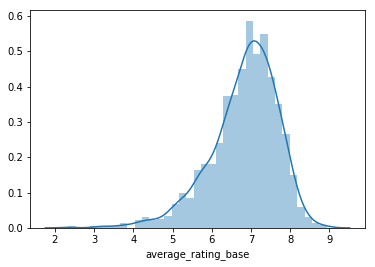

In [42]:
sns.distplot(board_games['average_rating_base'])

#### 3. Distribution of predictors 

#### 3.1. Playing time

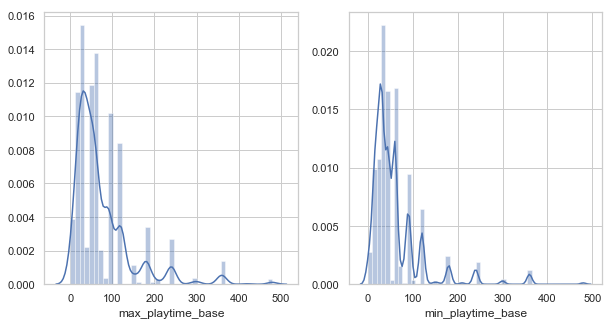

In [68]:
sns.set_style("whitegrid")
fig,axes=plt.subplots(1,2)
sns.distplot(board_games['max_playtime_base'],ax=axes[0])
plt.grid(True)
sns.distplot(board_games['min_playtime_base'],ax=axes[1])
plt.show()

It looks like that there are a few outliers with extreme long playtime.
Let's investigate those board games.

In [61]:
board_games[board_games['min_playtime_base']>1000]

,Unnamed: 0,Unnamed: 0_base,game_id_base,description_base,max_players_base,max_playtime_base,min_age_base,min_players_base,min_playtime_base,name_base,...,players_api,plays_api,playtime_api,price_api,price_au_api,price_ca_api,price_uk_api,visits_api,year_published_api,name_lower_api
150,150,1309,2081,This sprawling rendition of the American Civil...,2,1200,12,2,1200,The Civil War,...,2,0,120-1200,0.00,0.00,0.00,0.0,84,1983.0,the civil war
219,219,2449,4815,This is a war game like no other. Although th...,10,60000,14,8,60000,The Campaign for North Africa,...,8-10,0,60000,0.00,0.00,0.00,0.0,1276,1979.0,the campaign for north africa
250,250,3160,7614,"Welcome to A World at War, an immersive gaming...",8,2880,14,1,1440,A World at War,...,1-8,0,1440-2880,135.55,324.95,184.56,0.0,205,2003.0,a world at war


There are 3 board games where the minimum playtime is more than 1000 minutes (approximately 16.5 hours). These games look completely different from the rest of the games therefore we exclude them from out analysis.

In [64]:
board_games = board_games[board_games['min_playtime_base']<1000]

Let's check again the distributions.

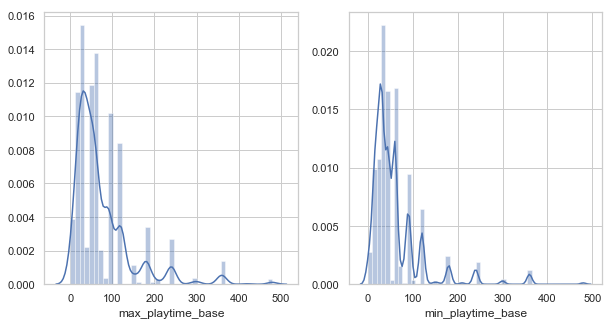

In [67]:
sns.set_style("whitegrid")
fig,axes=plt.subplots(1,2)
sns.distplot(board_games['max_playtime_base'],ax=axes[0])
plt.grid(True)
sns.distplot(board_games['min_playtime_base'],ax=axes[1])
plt.show()

Let's check the summary statistics.

In [74]:
board_games.agg(
    {
        "min_playtime_base": ["min", "max", "mean", "median", "std"],
        "max_playtime_base": ["min", "max", "mean", "median", "std"],
    }
)

,min_playtime_base,max_playtime_base
min,0.000000,0.000000
max,480.000000,480.000000
mean,59.879645,73.481422
median,45.000000,50.000000
std,60.191066,69.999359


It looks that the mean playtime of the games is around one hour and it ranges between 0 and 500 minutes (about 8 hours).We can also see that the minimum playtime is 0 minutes which should stand for missing information. Let's check what proportin of the observations are impacted by the 0 playtime. In case it only affects a few observations we can substitute it with the median playtime.

In [112]:
bg1 = round(len(board_games[board_games['max_playtime_base']==0])/len(board_games)*100, 2)
bg2 = round(len(board_games[board_games['min_playtime_base']==0])/len(board_games)*100, 2)
print("The proportion of values with 0  in the max_playtime_base field is: "  + str(bg1) + "%")
print("The proportion of values with 0  in the min_playtime_base field is: "  + str(bg2) + "%")

The proportion of values with 0  in the max_playtime_base field is: 1.7%
The proportion of values with 0  in the min_playtime_base field is: 1.37%


The proportion is below 2% so we can substitute the zeros with the median.

In [116]:
board_games['max_playtime_base']=board_games['max_playtime_base'].replace(0,board_games['max_playtime_base'].median())
board_games['min_playtime_base']=board_games['min_playtime_base'].replace(0,board_games['min_playtime_base'].median())

board_games.agg(
    {
        "min_playtime_base": ["min", "max", "mean", "median", "std"],
        "max_playtime_base": ["min", "max", "mean", "median", "std"],
    }
)

,min_playtime_base,max_playtime_base
min,1.000000,1.000000
max,480.000000,480.000000
mean,60.497577,74.329564
median,45.000000,50.000000
std,59.802582,69.403787


In [120]:
pd.options.display.max_columns = None
board_games[board_games['min_playtime_base']<10].head()

,Unnamed: 0,Unnamed: 0_base,game_id_base,description_base,max_players_base,max_playtime_base,min_age_base,min_players_base,min_playtime_base,name_base,playing_time_base,year_published_base,artist_base,category_base,designer_base,family_base,mechanic_base,publisher_base,average_rating_base,users_rated_base,name_lower_base,Unnamed: 0_api,average_learning_complexity_api,average_strategy_complexity_api,average_user_rating_api,comment_count_api,discount_api,id_api,is_historical_low_api,listing_clicks_api,max_players_api,max_playtime_api,min_age_api,min_players_api,min_playtime_api,name_api,num_user_ratings_api,players_api,plays_api,playtime_api,price_api,price_au_api,price_ca_api,price_uk_api,visits_api,year_published_api,name_lower_api
43,43,210,258,Fluxx is a card game in which the cards themse...,6,30,8,2,5,Fluxx,30,1997,"Raúl Castellanos,Michael Hays,Naomi Kageyama,A...",Card Game,"Andrew Looney,Kristin Looney","Fluxx,Mensa Select","Hand Management,Set Collection","Looney Labs,AMIGO Spiel + Freizeit GmbH,Black ...",5.69886,12304,fluxx,26,1.666667,2.0,2.541769,0,0.3,2anJuFWYTH,True,0,6.0,30.0,8.0,2.0,5.0,Fluxx,195,2-6,845,5-30,11.17,25.95,14.02,0.00,717,1997.0,fluxx
346,346,4523,19841,Pentago is an abstract strategy game for two p...,2,5,8,2,5,Pentago,5,2005,Mårten Skoger,Abstract Strategy,Tomas Flodén,"Combinatorial,Marble Games,Mensa Select,n in a...","Pattern Building,Pattern Recognition","Carrom Art,Egmont Polska,Giseh Verlag,KOSMOS,M...",6.42875,2326,pentago,46,0.000000,0.0,3.198437,0,0.0,NmpDUK2glo,False,0,2.0,5.0,8.0,2.0,5.0,Pentago,32,2,200,5,0.00,21.99,0.00,15.96,417,2005.0,pentago
437,437,5578,33468,"There are two versions of Zombie in my Pocket,...",1,5,11,1,5,Zombie in my Pocket,5,2007,"Carol LaGrow,Kwanchai Moriya","Adventure,Exploration,Fighting,Horror,Print & ...",Jeremiah Lee,"...in my Pocket,Solitaire Games","Modular Board,Pick-up and Deliver,Tile Placement","(Self-Published),(Web published)",6.33544,1416,zombie in my pocket,86,0.000000,0.0,3.294118,0,0.0,tC0oCrC6tC,False,0,1.0,5.0,11.0,1.0,5.0,Zombie in my Pocket,17,1,74,5,0.00,0.00,0.00,0.00,74,2007.0,zombie in my pocket
560,560,6606,65611,Serving Cthulhu is fun... except for all those...,6,5,10,2,5,Cthulhu Dice,5,2010,Alex Fernandez (I),"Dice,Horror,Humor,Party Game",Steve Jackson (I),Cthulhu Mythos,"Dice Rolling,Player Elimination","Black Monk,Edge Entertainment,Steve Jackson Games",5.22987,2280,cthulhu dice,73,0.000000,0.0,2.394737,0,0.0,cPZ8oOzPxS,False,0,6.0,5.0,10.0,2.0,5.0,Cthulhu Dice,19,2-6,69,5,0.00,0.00,52.94,0.00,100,2010.0,cthulhu dice
719,719,7759,122159,Explore the dark and horrifying mysteries of t...,6,30,8,2,5,Cthulhu Fluxx,30,2012,Derek Ring,Card Game,Keith Baker,"Cthulhu Mythos,Fluxx","Hand Management,Set Collection","Black Monk,Hobby Japan,Hobby World,Looney Labs...",6.13044,1875,cthulhu fluxx,25,0.000000,0.0,2.573864,0,0.3,JoKLJmpEkD,False,0,6.0,30.0,13.0,2.0,12.0,Cthulhu Fluxx,44,2-6,87,12-30,11.20,23.99,14.95,11.99,179,2012.0,cthulhu fluxx


There are still some very short board games with less then 10 minutes playtime but let's keep these records as they are.

#### 3.2. Minimum age

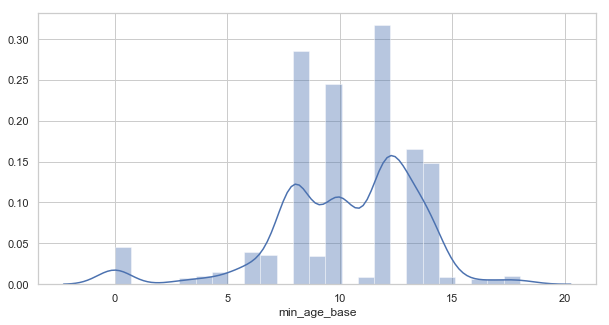

In [122]:
sns.set_style("whitegrid")
sns.distplot(board_games['min_age_base'])

In [123]:
board_games.agg(
    {
        "min_age_base": ["min", "max", "mean", "median", "std"]
    }
)

,min_age_base
min,0.000000
max,18.000000
mean,10.305331
median,10.000000
std,3.207785


The distribution of the minimum age is centered at 10 years and is about symmetric. Again, it seems that there are observations with 0 years of minimum age and there are also some games only for adults. The zeros can be either because there is no age limit or due to missing data. Let's investigate those records.

In [124]:
board_games[board_games['min_age_base']==0]

,Unnamed: 0,Unnamed: 0_base,game_id_base,description_base,max_players_base,max_playtime_base,min_age_base,min_players_base,min_playtime_base,name_base,playing_time_base,year_published_base,artist_base,category_base,designer_base,family_base,mechanic_base,publisher_base,average_rating_base,users_rated_base,name_lower_base,Unnamed: 0_api,average_learning_complexity_api,average_strategy_complexity_api,average_user_rating_api,comment_count_api,discount_api,id_api,is_historical_low_api,listing_clicks_api,max_players_api,max_playtime_api,min_age_api,min_players_api,min_playtime_api,name_api,num_user_ratings_api,players_api,plays_api,playtime_api,price_api,price_au_api,price_ca_api,price_uk_api,visits_api,year_published_api,name_lower_api
164,164,1585,2584,The computer game of submarine pursuit&#10;&#1...,4,30,0,1,30,Code Name: Sector,30,1977,NaN,"Deduction,Electronic,Modern Warfare,Nautical",Robert Doyle,NaN,"Line Drawing,Secret Unit Deployment","Miro Company,Parker Brothers",5.75361,72,code name: sector,3,2.0,2.0,2.750000,0,0.00,imcE8C5Zfe,False,0,4.0,30.0,0.0,1.0,30.0,Code Name: Sector,1,1-4,50,30,0.00,0.00,0.00,0.00,67,1977.0,code name: sector
191,191,1886,3265,NUTS! The Battle of the Bulge is a card game f...,4,120,0,2,120,NUTS!,120,1998,NaN,"Card Game,Wargame,World War II",David McElhannon,World War 2: Battle of the Bulge,"Campaign / Battle Card Driven,Hand Management,...",Decision Games (I),6.06774,93,nuts!,37,0.0,0.0,2.000000,0,0.00,ZI3jd57CEs,False,0,4.0,120.0,NaN,2.0,120.0,NUTS!,7,2-4,14,120,0.00,0.00,0.00,0.00,70,1998.0,nuts!
390,390,5132,26990,Container is a game about big ships and big pr...,5,90,0,3,90,Container,90,2007,Mike Doyle (I),"Economic,Industry / Manufacturing,Nautical,Tra...","Franz-Benno Delonge,Thomas Ewert",Valley Games Modern Line,"Auction/Bidding,Commodity Speculation,Pick-up ...","Valley Games, Inc.",7.11363,3567,container,37,3.0,4.0,3.234694,0,0.00,5ScWbv4Ygs,False,0,5.0,90.0,NaN,3.0,60.0,Container,49,3-5,135,60-90,0.00,0.00,0.00,0.00,490,2007.0,container
428,428,5480,32032,Monopoly: Electronic Banking Edition uses the ...,6,160,0,2,160,Monopoly: Electronic Banking,160,2007,NaN,"Economic,Electronic,Negotiation",(Uncredited),Monopoly,"Auction/Bidding,Roll / Spin and Move,Set Colle...","Hasbro,Parker Brothers",5.06011,453,monopoly: electronic banking,54,0.0,0.0,3.000000,0,0.00,aNduCVVtPD,False,0,6.0,160.0,8.0,2.0,160.0,Monopoly: Electronic Banking,5,2-6,7,160,0.00,0.00,0.00,0.00,101,2007.0,monopoly: electronic banking
429,429,5492,32149,"In Word Blur, The object is to get your teamma...",12,60,0,3,60,Word Blur,60,2007,NaN,"Party Game,Word Game",Geoff Girouard,NaN,NaN,"Word Blur, LLC",6.90441,136,word blur,32,0.0,0.0,4.000000,0,0.00,Le5fwRg5No,False,0,12.0,60.0,0.0,3.0,60.0,Word Blur,2,3-12,64,60,0.00,0.00,0.00,0.00,166,2007.0,word blur
431,431,5514,32424,"1848 Australia, is a semi-historical railroad ...",6,360,0,3,360,1848: Australia,360,2007,NaN,"Economic,Trains,Transportation","Helmut Ohley,Leonhard ""Lonny"" Orgler","18xx,Country: Australia,Oceanian Theme","Auction/Bidding,Route/Network Building,Stock H...","(Self-Published),Double-O Games",7.85590,144,1848: australia,63,0.0,0.0,3.750000,0,0.20,H2p50ZPajk,False,0,6.0,360.0,0.0,3.0,360.0,1848: Australia,4,3-6,27,360,59.95,118.95,68.99,0.00,239,2007.0,1848: australia
434,434,5525,32666,"In Wealth of Nations, you take on the role of ...",6,120,0,3,120,Wealth of Nations,120,2008,Gregor Benedetti,"Economic,Industry / Manufacturing,Negotiation,...",Nico Carroll,NaN,"Commodity Speculation,Tile Placement,Trading",TableStar Games,6.94260,1596,wealth of nations,47,0.0,0.0,3.046875,0,0.00,Eo20cnbWi7,True,0,6.0,120.0,13.0,3.0,120.0,Wealth of Nations,16,3-6,35,120,0.00,0.00,0.00,0.00,114,2008.0,wealth of nations
458,458,5755,36424,"Gulf, Mobile &amp; Ohio is the third entry in ...",5,60,0,3,60,"Gulf, Mobile & Ohio",60,2008,NaN,"Economic,Trains,Transportation",Eddie Robbins,"Admin: Better Description Needed!,Cube Rails,H...","Auction/Bidding,Route/Network Building,

It is more likely that 0 stands for missing information so we can replace it with the mean as the distribution seems symmetric.

In [125]:
board_games['min_age_base']=board_games['min_age_base'].replace(0,board_games['min_age_base'].mean())

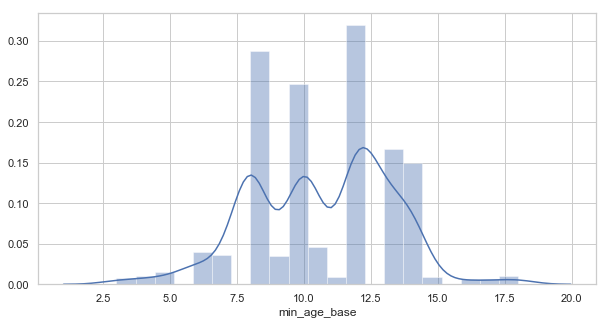

In [126]:
sns.set_style("whitegrid")
sns.distplot(board_games['min_age_base'])

#### 3.3. Number of players

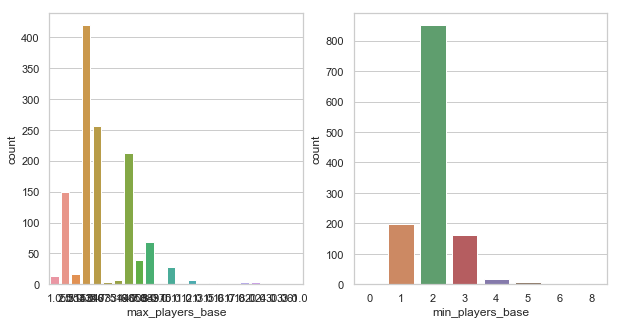

In [168]:
# Create aggregated datasets
board_games_agg1 = board_games.groupby('max_players_base').agg({'game_id_base':'count'}).rename(columns={'game_id_base':'count'})
board_games_agg1.reset_index(inplace=True)

board_games_agg2 = board_games.groupby('min_players_base').agg({'game_id_base':'count'}).rename(columns={'game_id_base':'count'})
board_games_agg2.reset_index(inplace=True)

sns.set_style("whitegrid")
fig,axes=plt.subplots(1,2)
p = sns.barplot(x='max_players_base', y='count', data=board_games_agg1, ax=axes[0]);
sns.barplot(x='min_players_base', y='count', data=board_games_agg2, ax=axes[1])
plt.show()



In [169]:
board_games.agg(
    {
        "max_players_base": ["min", "max", "mean", "median", "std"],
        "min_players_base": ["min", "max", "mean", "median", "std"]
    }
)

,max_players_base,min_players_base
min,1.000000,0.000000
max,61.000000,8.000000
mean,5.004680,2.033118
median,5.000000,2.000000
std,2.947537,0.710040


There are some board games which can be plaed alone and we can see that there are a few extremes with 99 maximum players. We will replace the zeros and the outliers with the median in case of the max players.

In [172]:
board_games['max_players_base']=board_games['max_players_base'].replace(0,board_games['max_players_base'].median())
board_games['max_players_base']=board_games['max_players_base'].replace(99,board_games['max_players_base'].median())

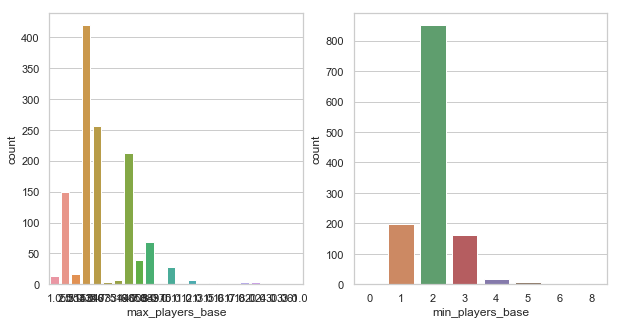

In [173]:
# Create aggregated datasets
board_games_agg1 = board_games.groupby('max_players_base').agg({'game_id_base':'count'}).rename(columns={'game_id_base':'count'})
board_games_agg1.reset_index(inplace=True)

board_games_agg2 = board_games.groupby('min_players_base').agg({'game_id_base':'count'}).rename(columns={'game_id_base':'count'})
board_games_agg2.reset_index(inplace=True)

sns.set_style("whitegrid")
fig,axes=plt.subplots(1,2)
sns.barplot(x='max_players_base', y='count', data=board_games_agg1, ax=axes[0]);
plt.grid(True)
sns.barplot(x='min_players_base', y='count', data=board_games_agg2, ax=axes[1])
plt.show()

#### 3.4. Year published

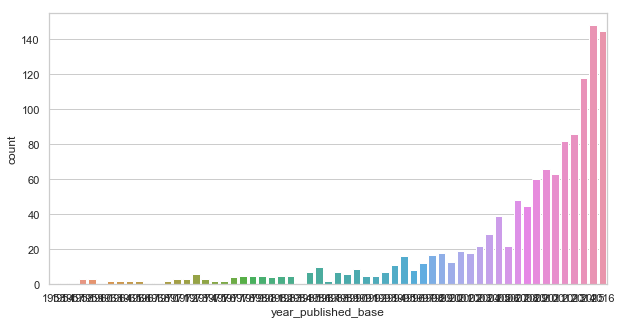

In [175]:
# Create aggregated datasets
board_games_agg3 = board_games.groupby('year_published_base').agg({'game_id_base':'count'}).rename(columns={'game_id_base':'count'})
board_games_agg3.reset_index(inplace=True)

sns.set_style("whitegrid")
sns.barplot(x='year_published_base', y='count', data=board_games_agg3);


In [176]:
board_games.agg(
    {
        "year_published_base": ["min", "max", "mean", "median", "std"]
    }
)


,year_published_base
min,1953.000000
max,2016.000000
mean,2006.881260
median,2011.000000
std,11.233379


In [178]:
board_games['year_published_category_base'] = pd.cut(x=board_games['year_published_base'], 
                     bins=[1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020],
                     labels=['1951-1960', 
                             '1961-1970',
                             '1971-1980',
                             '1981-1990',
                             '1991-2000',
                             '2001-2010',
                             '2011-2020'])

In [180]:
pd.crosstab(board_games['year_published_category_base'], board_games['year_published_base'])

year_published_base,1953,1954,1957,1958,1959,1960,1963,1964,1965,1966,1967,1968,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
year_published_category_base,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1951-1960,1,1,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1961-1970,0,0,0,0,0,0,2,2,2,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1971-1980,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,6,3,2,2,4,5,5,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1981-1990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,5,5,1,7,10,2,7,6,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1991-2000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,7,11,16,8,12,17,18,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2001-2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,18,22,29,39,22,48,45,60,66,0,0,0,0,0,0
2011-2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,63,82,86,118,148,145


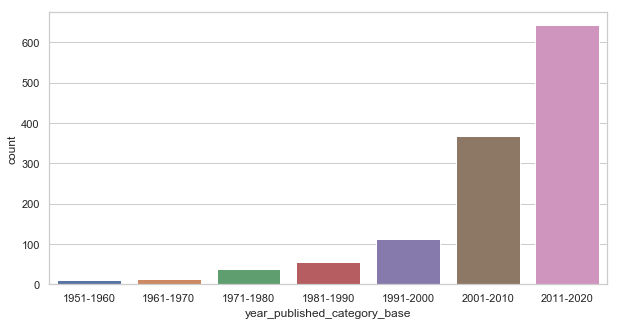

In [182]:
board_games_agg4 = board_games.groupby('year_published_category_base').agg({'game_id_base':'count'}).rename(columns={'game_id_base':'count'})
board_games_agg4.reset_index(inplace=True)

sns.set_style("whitegrid")
sns.barplot(x='year_published_category_base', y='count', data=board_games_agg4);


We can see that there are a few very old board games while the majority was released after 2010.

#### 3.5. Number of user ratings